In [1]:

import numpy as np
import h5py
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

#IMPORT ALL PRE BUILD FUNCTION 
from func import *
from momentum import *
from RMSprop import *
from adam import *
from adabelief import *
from matplotlib import pyplot as plt

In [2]:
hf1 = h5py.File('train_datasets.h5','r')  #READ THE DATASETS
X_train = hf1.get('X_train')     #GET THE X TRAINING DATASETS
Y_train = hf1.get('Y_train')
#flatten the array and normalize 
X_train = np.reshape(X_train,(X_train.shape[0],-1))  #FLATTEN   (209, 64 *64 * 3)
X_train = preprocessing.normalize(X_train)           #NORMALIZING THE DATASETS

Y_train = np.reshape(Y_train,(Y_train.shape[0],1))                # MAKING SURE IT IS IN CORRECT SHAPE

print("Shape of X_train {}  and  Y_train {}".format(X_train.shape,Y_train.shape))

Shape of X_train (259, 12288)  and  Y_train (259, 1)


In [3]:
def model(X,Y,learning_rate,num_iter,hidden_size,keep_prob,optimizer):
    L = len(hidden_size)
    params = initilization(X.shape[1], hidden_size)
    costs = []
    itr  = []

    if optimizer == 'momentum':
        v = initilization_moment(params)

    elif optimizer == 'rmsprop':
        s = initilization_RMS(params)

    elif optimizer == 'adam' :
        v,s = initilization_Adam(params)

    elif optimizer == 'adabelief' :
        v,s = initilization_AdaBelief(params)

    for i in range(1,num_iter):
        MiniBatches = RandomMiniBatches(X, Y, 32)   # GET RAMDOMLY MINIBATCHES
        p , q = MiniBatches[2]
        for MiniBatch in MiniBatches:               #LOOP FOR MINIBATCHES

            (MiniBatch_X, MiniBatch_Y) = MiniBatch

            cache, A = model_forward(MiniBatch_X, params, L,keep_prob)     #FORWARD PROPOGATIONS
            cost = cost_f(A, MiniBatch_Y)                                  #COST FUNCTION
            grad = backward(MiniBatch_X, MiniBatch_Y, params, cache, L,keep_prob) #BACKWARD PROPAGATION 

            if optimizer == 'momentum':
                params = update_params_with_momentum(params, grad, v, beta=0.9,learning_rate=learning_rate)

            elif optimizer == 'rmsprop':
               params = update_params_with_RMS(params, grad, s, beta=0.9,learning_rate=learning_rate)

            elif optimizer == 'adam' :
                params = update_params_with_Adam(params, grad,v, s, beta1=0.9,beta2=0.999,  learning_rate=learning_rate,t=i)                                         #UPDATE PARAMETERS
            
            elif optimizer == 'adabelief' :
                params = update_params_with_AdaBelief(params, grad,v, s, beta1=0.9,beta2=0.999,  learning_rate=learning_rate,t=i)                                         #UPDATE PARAMETERS

            elif optimizer == "minibatch":
                params = update_params(params, grad,learning_rate=learning_rate) 

           
        
        if i%5 == 0:
            costs.append(cost)
            itr.append(i)
            if i % 100 == 0 :
                print('cost of iteration______{}______{}'.format(i,cost))
    return params,costs,itr

In [4]:
params,cost_adabelief, itr = model(X_train, Y_train, learning_rate = 0.01,
               num_iter=500, hidden_size=[100, 1],keep_prob=1,optimizer='adabelief')
Y_train_pre = predict(X_train, params, 2)
print('train_accuracy------------', accuracy_score(Y_train_pre, Y_train))

cost of iteration______100______0.3570427143043695
cost of iteration______200______0.013333209698091058
cost of iteration______300______0.01696000518974902
cost of iteration______400______0.004702519104485532
train_accuracy------------ 0.9420849420849421


In [5]:
params, cost_sgd,itr = model(X_train, Y_train, learning_rate = 0.01,
               num_iter=500, hidden_size=[100, 1],keep_prob=1,optimizer='minibatch')
Y_train_pre = predict(X_train, params, 2)
print('train_accuracy------------', accuracy_score(Y_train_pre, Y_train))

cost of iteration______100______0.35302967575683797
cost of iteration______200______0.472914548745098
cost of iteration______300______0.4884728238471557
cost of iteration______400______0.21551100063345618
train_accuracy------------ 0.8494208494208494


In [6]:
params,cost_momentum, itr = model(X_train, Y_train, learning_rate = 0.01,
               num_iter=500, hidden_size=[100, 1],keep_prob=1,optimizer='momentum')
Y_train_pre = predict(X_train, params, 2)
print('train_accuracy------------', accuracy_score(Y_train_pre, Y_train))

cost of iteration______100______0.36278494129038086
cost of iteration______200______0.4681552335189021
cost of iteration______300______0.382226159384529
cost of iteration______400______0.18219310793752702
train_accuracy------------ 0.8725868725868726


In [7]:
params,cost_rms,itr = model(X_train, Y_train, learning_rate = 0.01,
               num_iter=500, hidden_size=[100, 1],keep_prob=1,optimizer='rmsprop')
Y_train_pre = predict(X_train, params, 2)
print('train_accuracy------------', accuracy_score(Y_train_pre, Y_train))

cost of iteration______100______0.2983858963793841
cost of iteration______200______0.004245700579927428
cost of iteration______300______0.2629426607580565
cost of iteration______400______0.31944824707807556
train_accuracy------------ 0.9613899613899614


In [8]:
params,cost_adam, itr = model(X_train, Y_train, learning_rate = 0.01,
               num_iter=500, hidden_size=[100, 1],keep_prob=1,optimizer='adam')
Y_train_pre = predict(X_train, params, 2)
print('train_accuracy------------', accuracy_score(Y_train_pre, Y_train))

cost of iteration______100______0.3266223660473619
cost of iteration______200______0.08214547683157716
cost of iteration______300______0.0025645257286439583
cost of iteration______400______0.058015188756586206
train_accuracy------------ 0.9845559845559846


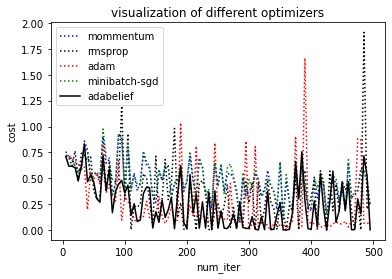

In [9]:
plot_fn(itr,cost_momentum,cost_rms,cost_adam,cost_adabelief,cost_sgd)